In [167]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [168]:
# Load the dataset
df = pd.read_excel("C:/data/New Bank_loan_data (1) (2) (1).xlsx")

In [169]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [171]:
# Returns a tuple representing the dimensions of the DataFrame
df.shape

(5000, 16)

In [172]:
# Count the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [173]:
# Handling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Home Ownership'].fillna('Unknown', inplace=True)
df['Online'].fillna(df['Online'].mode()[0], inplace=True)


In [174]:
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

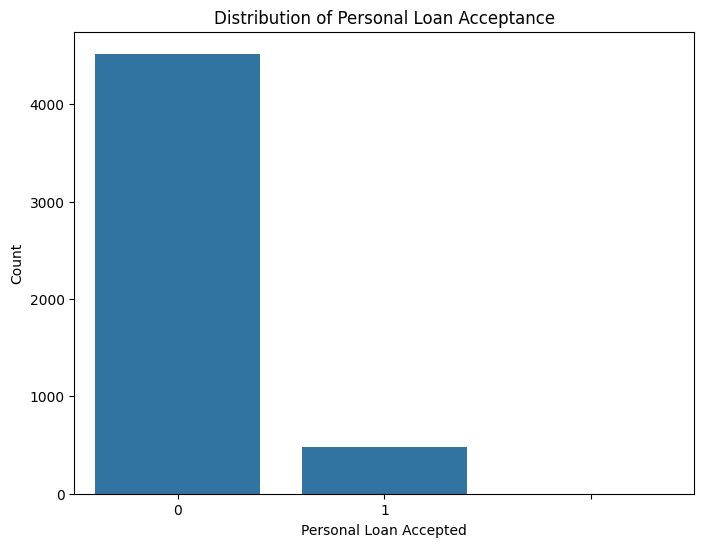

In [175]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted')
plt.ylabel('Count')
plt.show()

In [176]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)


In [177]:
df.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,M,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,M,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,M,15,11.0,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,M,9,100.0,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,M,8,45.0,4,1.0,2,0,Rent,0,0,0,0.0,1


In [178]:
# Handle missing values (if any)
df.dropna(inplace=True)

In [179]:
df.Gender=df.Gender.map({'M':1,'F':0, 'O': 2})
df.Gender.value_counts()

Gender
1.0    3273
0.0    1607
2.0      96
Name: count, dtype: int64

In [180]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])

In [181]:
df.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,1,49.0,4,1.6,1,0,1,0,1,0,0.0,0
1,45,1.0,19,34.0,3,1.5,1,0,2,0,1,0,0.0,0
2,39,1.0,15,11.0,1,1.0,1,0,2,0,0,0,0.0,0
3,35,1.0,9,100.0,1,2.7,2,0,2,0,0,0,0.0,0
4,35,1.0,8,45.0,4,1.0,2,0,2,0,0,0,0.0,1


In [182]:
# Handling remaining missing values
df.replace(' ', np.nan, inplace=True)  # Replace empty strings with NaN
df.dropna(inplace=True)  # Drop rows with NaN values

In [183]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [184]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
print(y_train.value_counts())


Personal Loan
0.0    3609
1.0     371
Name: count, dtype: int64


In [187]:
print(y_train.unique())


[0. 1.]


In [188]:
# Remove rows with invalid values in y_train
y_train = y_train[(y_train == 0) | (y_train == 1)]

# Convert the data type of y_train to integer
y_train = y_train.astype(int)


In [189]:
print(y_train.unique())


[0 1]


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [191]:
print("Number of missing values in y:", y.isna().sum())
print("Unique values in y:", y.unique())

Number of missing values in y: 0
Unique values in y: [0. 1.]


In [192]:
# Train the SVM model
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [193]:
# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

In [194]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9618090452261306


In [195]:
# Initialize and train Decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [196]:
# Predict on the test set
y_pred = decision_tree_classifier.predict(X_test)

In [197]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9748743718592965


In [198]:
import joblib
joblib.dump(svm_classifier, 'traineddd_model.pkl')

['traineddd_model.pkl']